<a href="https://colab.research.google.com/github/FelixEbenezer/MLOps/blob/main/Mlflow_NaivesBayes_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mlflow

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *
import matplotlib.pyplot as plt

import mlflow
import mlflow.sklearn

In [3]:
credito = pd.read_csv('/content/Credit.csv')
credito.shape

(1000, 21)

In [ ]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [4]:
for col in credito.columns:
    if credito[col].dtype == 'object':
        credito[col] = credito[col].astype('category').cat.codes

In [5]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,2,6,1,7,1169,0,3,4,3,2,...,2,67,1,1,2,3,1,1,1,1
1,1,48,3,7,5951,3,0,2,0,2,...,2,22,1,1,1,3,1,0,1,0
2,0,12,1,4,2096,3,1,2,3,2,...,2,49,1,1,1,2,2,0,1,1
3,2,42,3,5,7882,3,1,2,3,1,...,0,45,1,0,1,3,2,0,1,1
4,2,24,2,1,4870,3,0,3,3,2,...,1,53,1,0,2,3,2,0,1,0


In [6]:
previsores = credito.iloc[:,0:20].values
classe = credito.iloc[:,20].values

In [7]:
previsores

array([[ 2,  6,  1, ...,  1,  1,  1],
       [ 1, 48,  3, ...,  1,  0,  1],
       [ 0, 12,  1, ...,  2,  0,  1],
       ...,
       [ 0, 12,  3, ...,  1,  0,  1],
       [ 2, 45,  3, ...,  1,  1,  1],
       [ 1, 45,  1, ...,  1,  0,  1]])

In [8]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,classe,
                                        test_size=0.3,random_state=123)

2022/05/04 18:14:19 INFO mlflow.tracking.fluent: Experiment with name 'nbexperimento' does not exist. Creating a new experiment.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Modelo:  e7318543d9954312af41622010f479a7


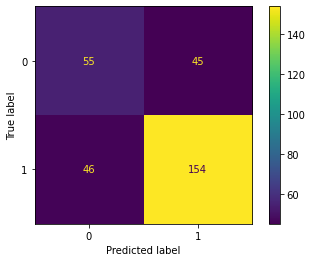

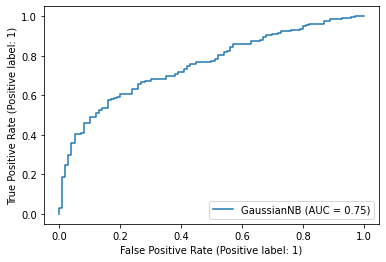

In [9]:
mlflow.set_experiment("nbexperimento")

with mlflow.start_run():
    naive_bayes = GaussianNB()
    naive_bayes.fit(X_treinamento, y_treinamento)
    previsoes = naive_bayes.predict(X_teste)
    
    #métricas
    acuracia = accuracy_score(y_teste, previsoes)
    recall = recall_score(y_teste, previsoes)
    precision = precision_score(y_teste, previsoes)
    f1 = f1_score(y_teste, previsoes)
    auc= roc_auc_score(y_teste, previsoes)
    log = log_loss(y_teste, previsoes)
    
    #registrar métricas
    mlflow.log_metric("acuracia",acuracia)
    mlflow.log_metric("recall",recall)
    mlflow.log_metric("precision",precision)
    mlflow.log_metric("f1",f1)
    mlflow.log_metric("auc",auc)
    mlflow.log_metric("log",log)
    
    #gráficos
    confusion = plot_confusion_matrix(naive_bayes, X_teste, y_teste)
    plt.savefig("confusion.png")
    roc = plot_roc_curve(naive_bayes, X_teste, y_teste)
    plt.savefig("roc.png")
    
    #logar gráficos
    mlflow.log_artifact("confusion.png")
    mlflow.log_artifact("roc.png")   
    
    #modelo
    mlflow.sklearn.log_model(naive_bayes,"ModeloNB")
    
    
    #informações da execução
    print("Modelo: ", mlflow.active_run().info.run_uuid)    
mlflow.end_run()

# 2eme modele

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

In [19]:
def treina_rf(n_estimators):
    mlflow.set_experiment("rfexperimento")
    with mlflow.start_run():
        
        modelorf = RandomForestClassifier(n_estimators=n_estimators)
        modelorf.fit(X_treinamento, y_treinamento)
        previsoes = modelorf.predict(X_teste)

        #log de hiper parametros
        mlflow.log_param("n_estimators", n_estimators)

        #métricas
        acuracia = accuracy_score(y_teste, previsoes)
        recall = recall_score(y_teste, previsoes)
        precision = precision_score(y_teste, previsoes)
        f1 = f1_score(y_teste, previsoes)
        auc= roc_auc_score(y_teste, previsoes)
        log = log_loss(y_teste, previsoes)

        #registrar métricas
        mlflow.log_metric("acuracia",acuracia)
        mlflow.log_metric("recall",recall)
        mlflow.log_metric("precision",precision)
        mlflow.log_metric("f1",f1)
        mlflow.log_metric("auc",auc)
        mlflow.log_metric("log",log)    

        #gráficos
        confusion = plot_confusion_matrix(modelorf, X_teste, y_teste)
        plt.savefig("confusionrf.png")
        roc = plot_roc_curve(modelorf, X_teste, y_teste)
        plt.savefig("rocfr.png")

        #logar gráficos
        mlflow.log_artifact("confusionrf.png")
        mlflow.log_artifact("rocfr.png")      

        #modelo
        mlflow.sklearn.log_model(modelorf,"ModeloNB")

        #informações da execução
        print("Modelo: ", mlflow.active_run().info.run_uuid)   

    mlflow.end_run()

2022/05/04 18:39:25 INFO mlflow.tracking.fluent: Experiment with name 'rfexperimento' does not exist. Creating a new experiment.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Modelo:  5778168cd7394e5291016b7521277c02


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Modelo:  1f028bcaf2cb4555b48785518dd37824


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Modelo:  f9069eef3cea457485e4254be27ea6ed


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Modelo:  2ef426abc7ed4a189c3c883bffab7b92


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Modelo:  2d1c59c54a5f4730ae70de1a1641fed3


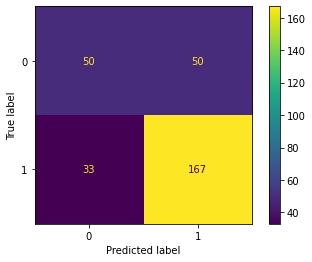

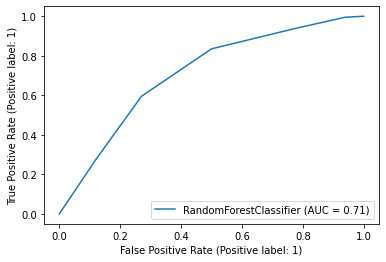

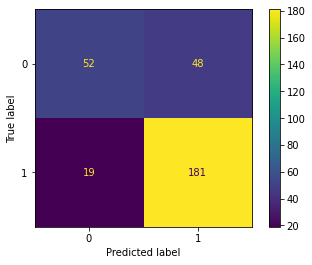

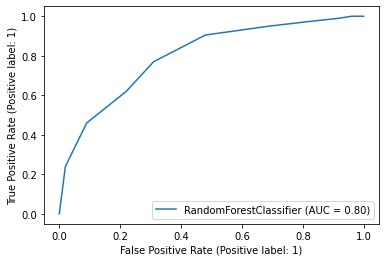

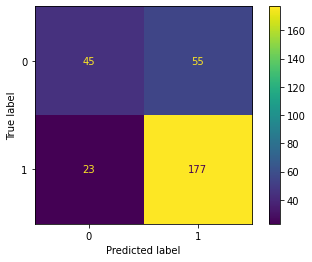

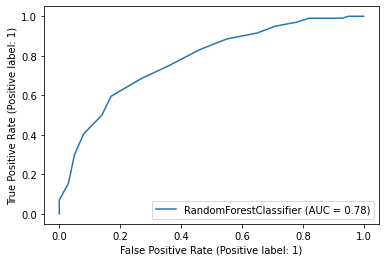

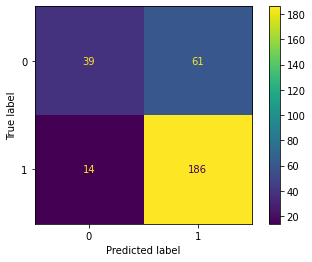

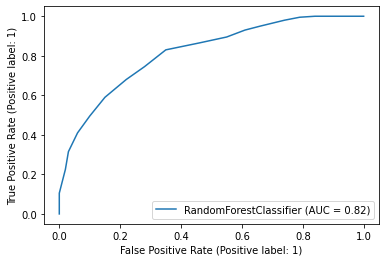

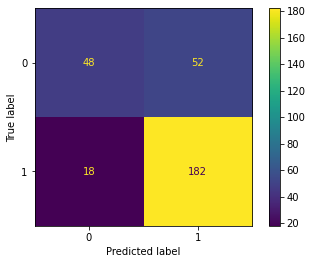

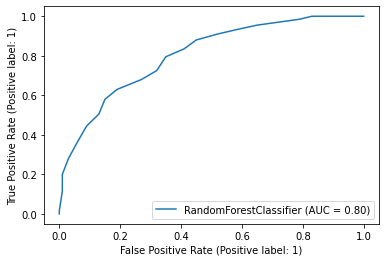

In [20]:
arvores = [5,10,20,25,30]
for n in arvores:
    treina_rf(n)

# MODELE KERAS

In [21]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist
import mlflow
import mlflow.tensorflow

In [ ]:
(X_treinamento, y_treinamento),(X_teste, y_teste) = mnist.load_data()
plt.imshow(X_treinamento[29],cmap='gray')
plt.title(y_treinamento[29])

In [23]:
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))

In [ ]:
X_teste[0]

In [25]:
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')
X_treinamento /= 255
X_teste /= 255

In [26]:
y_treinamento = np_utils.to_categorical(y_treinamento,10)
y_teste = np_utils.to_categorical(y_teste,10)

In [27]:
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [28]:
def treina_dl(n_camadas_ocultas,n_units,activation,drop_out, epochs):
    mlflow.set_experiment("DLExperimento")
    
    with mlflow.start_run():
        mlflow.tensorflow.autolog()
        
        #registro de tags
        mlflow.set_tag("n_camadas_ocultas",n_camadas_ocultas)
        mlflow.set_tag("n_units",n_units)
        mlflow.set_tag("activation",activation)
        mlflow.set_tag("drop_out",drop_out)
        mlflow.set_tag("epochs",epochs)

    
        modelo = Sequential()
        
        #cria camada oculta mais camada de entrada
        modelo.add(Dense(units=n_units, activation=activation, input_dim=784))
        modelo.add(Dropout(drop_out))
        
        #camadas ocultas adicionais, com drop out
        for n in range(n_camadas_ocultas):
            modelo.add(Dense(units=n_units, activation=activation))
            modelo.add(Dropout(drop_out))            
        
        #camada de saída
        modelo.add(Dense(units=10,activation='softmax'))
        
        modelo.compile(optimizer='adam', loss="categorical_crossentropy",metrics=['accuracy'])
        
        modelo.summary()
        
        historico = modelo.fit(X_treinamento, y_treinamento, epochs =epochs, 
                              validation_data=(X_teste,y_teste))
        
        #grafico para erros e acuracia
        historico.history.keys()
        loss = plt.plot(historico.history['val_loss'])
        plt.savefig("loss.png")
        acuracia = plt.plot(historico.history['val_accuracy'])
        plt.savefig("acuracia.png")
        
        #registrar artefatos
        mlflow.log_artifact("loss.png")
        mlflow.log_artifact("acuracia.png")
       
        #informações de execução
        print("Modelo: ", mlflow.active_run().info.run_uuid)  
    mlflow.end_run()           

2022/05/04 18:47:24 INFO mlflow.tracking.fluent: Experiment with name 'DLExperimento' does not exist. Creating a new experiment.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 1570      
                                                                 
 dropout (Dropout)           (None, 2)                 0         
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dropout_1 (Dropout)         (None, 2)                 0         
                                                                 
 dense_2 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,606
Trainable params: 1,606
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
1875/1875 [==============================] -

2022/05/04 18:47:53 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  ae8c05e1b0ec4a4083fb4d66c9d6184e
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 2)                 1570      
                                                                 
 dropout_2 (Dropout)         (None, 2)                 0         
                                                                 
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
 dropout_3 (Dropout)         (None, 2)                 0         
                                                                 
 dense_5 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,606
Trainable params: 1,606
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4


2022/05/04 18:48:18 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  83c92581319c42af9fd19c1f9f1ca3c1
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2)                 1570      
                                                                 
 dropout_4 (Dropout)         (None, 2)                 0         
                                                                 
 dense_7 (Dense)             (None, 2)                 6         
                                                                 
 dropout_5 (Dropout)         (None, 2)                 0         
                                                                 
 dense_8 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,606
Trainable params: 1,606
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5


2022/05/04 18:49:05 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  863a5d0d23584d8fb0bf87be8d84398f
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 2)                 1570      
                                                                 
 dropout_6 (Dropout)         (None, 2)                 0         
                                                                 
 dense_10 (Dense)            (None, 2)                 6         
                                                                 
 dropout_7 (Dropout)         (None, 2)                 0         
                                                                 
 dense_11 (Dense)            (None, 10)                30        
                                                                 
Total params: 1,606
Trainable params: 1,606
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3


2022/05/04 18:49:32 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  e2b0806864b540a5bc252ebda9649bad
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 2)                 1570      
                                                                 
 dropout_8 (Dropout)         (None, 2)                 0         
                                                                 
 dense_13 (Dense)            (None, 2)                 6         
                                                                 
 dropout_9 (Dropout)         (None, 2)                 0         
                                                                 
 dense_14 (Dense)            (None, 10)                30        
                                                                 
Total params: 1,606
Trainable params: 1,606
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4


2022/05/04 18:49:57 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  15a1c432c36f404ebe075ebcfa80cca5
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 2)                 1570      
                                                                 
 dropout_10 (Dropout)        (None, 2)                 0         
                                                                 
 dense_16 (Dense)            (None, 2)                 6         
                                                                 
 dropout_11 (Dropout)        (None, 2)                 0         
                                                                 
 dense_17 (Dense)            (None, 10)                30        
                                                                 
Total params: 1,606
Trainable params: 1,606
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5


2022/05/04 18:50:29 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  d7f5644323fb4dbfb025235a5dab3a97
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 2)                 1570      
                                                                 
 dropout_12 (Dropout)        (None, 2)                 0         
                                                                 
 dense_19 (Dense)            (None, 2)                 6         
                                                                 
 dropout_13 (Dropout)        (None, 2)                 0         
                                                                 
 dense_20 (Dense)            (None, 10)                30        
                                                                 
Total params: 1,606
Trainable params: 1,606
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3


2022/05/04 18:50:56 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  cc14c110438340df8f76b3dc94311e5f
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 2)                 1570      
                                                                 
 dropout_14 (Dropout)        (None, 2)                 0         
                                                                 
 dense_22 (Dense)            (None, 2)                 6         
                                                                 
 dropout_15 (Dropout)        (None, 2)                 0         
                                                                 
 dense_23 (Dense)            (None, 10)                30        
                                                                 
Total params: 1,606
Trainable params: 1,606
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4


2022/05/04 18:51:22 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  ffcf78463cf840c7920b09fd56bd7303
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 2)                 1570      
                                                                 
 dropout_16 (Dropout)        (None, 2)                 0         
                                                                 
 dense_25 (Dense)            (None, 2)                 6         
                                                                 
 dropout_17 (Dropout)        (None, 2)                 0         
                                                                 
 dense_26 (Dense)            (None, 10)                30        
                                                                 
Total params: 1,606
Trainable params: 1,606
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5


2022/05/04 18:51:53 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  e2003df137bd492895ef6f033df312ef
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 2)                 1570      
                                                                 
 dropout_18 (Dropout)        (None, 2)                 0         
                                                                 
 dense_28 (Dense)            (None, 2)                 6         
                                                                 
 dropout_19 (Dropout)        (None, 2)                 0         
                                                                 
 dense_29 (Dense)            (None, 10)                30        
                                                                 
Total params: 1,606
Trainable params: 1,606
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3


2022/05/04 18:52:19 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  d155d08321984a6e9e8bcbb26d264de3
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 2)                 1570      
                                                                 
 dropout_20 (Dropout)        (None, 2)                 0         
                                                                 
 dense_31 (Dense)            (None, 2)                 6         
                                                                 
 dropout_21 (Dropout)        (None, 2)                 0         
                                                                 
 dense_32 (Dense)            (None, 10)                30        
                                                                 
Total params: 1,606
Trainable params: 1,606
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4

2022/05/04 18:52:45 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  59239e439430499e93cf5f2d18e98e4d
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 2)                 1570      
                                                                 
 dropout_22 (Dropout)        (None, 2)                 0         
                                                                 
 dense_34 (Dense)            (None, 2)                 6         
                                                                 
 dropout_23 (Dropout)        (None, 2)                 0         
                                                                 
 dense_35 (Dense)            (None, 10)                30        
                                                                 
Total params: 1,606
Trainable params: 1,606
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5

2022/05/04 18:53:16 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  c2ebed7df8ce4488b123e359714ef984
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 4)                 3140      
                                                                 
 dropout_24 (Dropout)        (None, 4)                 0         
                                                                 
 dense_37 (Dense)            (None, 4)                 20        
                                                                 
 dropout_25 (Dropout)        (None, 4)                 0         
                                                                 
 dense_38 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3

2022/05/04 18:53:42 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  430d3b6472a342db873b6cc08ff95468
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 4)                 3140      
                                                                 
 dropout_26 (Dropout)        (None, 4)                 0         
                                                                 
 dense_40 (Dense)            (None, 4)                 20        
                                                                 
 dropout_27 (Dropout)        (None, 4)                 0         
                                                                 
 dense_41 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4

2022/05/04 18:54:08 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  184e3c5c521a461ca48d25af2a7756b2
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 4)                 3140      
                                                                 
 dropout_28 (Dropout)        (None, 4)                 0         
                                                                 
 dense_43 (Dense)            (None, 4)                 20        
                                                                 
 dropout_29 (Dropout)        (None, 4)                 0         
                                                                 
 dense_44 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5

2022/05/04 18:54:39 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  a44432cc163f4fdfb376557cb24e712c
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 4)                 3140      
                                                                 
 dropout_30 (Dropout)        (None, 4)                 0         
                                                                 
 dense_46 (Dense)            (None, 4)                 20        
                                                                 
 dropout_31 (Dropout)        (None, 4)                 0         
                                                                 
 dense_47 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3

2022/05/04 18:55:05 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  d8637529346840f0a2a57cc78cefeee0
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 4)                 3140      
                                                                 
 dropout_32 (Dropout)        (None, 4)                 0         
                                                                 
 dense_49 (Dense)            (None, 4)                 20        
                                                                 
 dropout_33 (Dropout)        (None, 4)                 0         
                                                                 
 dense_50 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4

2022/05/04 18:55:31 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  76cfda5cdca745a5bc3e75b7ac3fb7a0
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 4)                 3140      
                                                                 
 dropout_34 (Dropout)        (None, 4)                 0         
                                                                 
 dense_52 (Dense)            (None, 4)                 20        
                                                                 
 dropout_35 (Dropout)        (None, 4)                 0         
                                                                 
 dense_53 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5

2022/05/04 18:56:02 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  52c66323553e498a8379856aead9cea0
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 4)                 3140      
                                                                 
 dropout_36 (Dropout)        (None, 4)                 0         
                                                                 
 dense_55 (Dense)            (None, 4)                 20        
                                                                 
 dropout_37 (Dropout)        (None, 4)                 0         
                                                                 
 dense_56 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3

2022/05/04 18:56:28 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  77eb1d1d1e1246609823cfb9d1967f6d
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 4)                 3140      
                                                                 
 dropout_38 (Dropout)        (None, 4)                 0         
                                                                 
 dense_58 (Dense)            (None, 4)                 20        
                                                                 
 dropout_39 (Dropout)        (None, 4)                 0         
                                                                 
 dense_59 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4

2022/05/04 18:56:55 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  5b10f35c2a6b4079a411192695d15fd9
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 4)                 3140      
                                                                 
 dropout_40 (Dropout)        (None, 4)                 0         
                                                                 
 dense_61 (Dense)            (None, 4)                 20        
                                                                 
 dropout_41 (Dropout)        (None, 4)                 0         
                                                                 
 dense_62 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5

2022/05/04 18:57:26 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  0d8046bc1ce0493e9cfa39fd6affcd79
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 4)                 3140      
                                                                 
 dropout_42 (Dropout)        (None, 4)                 0         
                                                                 
 dense_64 (Dense)            (None, 4)                 20        
                                                                 
 dropout_43 (Dropout)        (None, 4)                 0         
                                                                 
 dense_65 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3

2022/05/04 18:57:52 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  38ffa607e37f4f0caf39a9dca73cc9a4
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 4)                 3140      
                                                                 
 dropout_44 (Dropout)        (None, 4)                 0         
                                                                 
 dense_67 (Dense)            (None, 4)                 20        
                                                                 
 dropout_45 (Dropout)        (None, 4)                 0         
                                                                 
 dense_68 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4

2022/05/04 18:58:18 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  e6530f5198a14db4bf88a02cfe5dcc4a
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 4)                 3140      
                                                                 
 dropout_46 (Dropout)        (None, 4)                 0         
                                                                 
 dense_70 (Dense)            (None, 4)                 20        
                                                                 
 dropout_47 (Dropout)        (None, 4)                 0         
                                                                 
 dense_71 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5

2022/05/04 18:58:49 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  52ba75df3cd84d70bae8c328524471d4
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 6)                 4710      
                                                                 
 dropout_48 (Dropout)        (None, 6)                 0         
                                                                 
 dense_73 (Dense)            (None, 6)                 42        
                                                                 
 dropout_49 (Dropout)        (None, 6)                 0         
                                                                 
 dense_74 (Dense)            (None, 10)                70        
                                                                 
Total params: 4,822
Trainable params: 4,822
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3

2022/05/04 18:59:15 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  aef5f2d6e3bd40fc888e000ced377b63
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 6)                 4710      
                                                                 
 dropout_50 (Dropout)        (None, 6)                 0         
                                                                 
 dense_76 (Dense)            (None, 6)                 42        
                                                                 
 dropout_51 (Dropout)        (None, 6)                 0         
                                                                 
 dense_77 (Dense)            (None, 10)                70        
                                                                 
Total params: 4,822
Trainable params: 4,822
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4

2022/05/04 18:59:41 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  e0b6fdcc445b45548bdf866f356131cc
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 6)                 4710      
                                                                 
 dropout_52 (Dropout)        (None, 6)                 0         
                                                                 
 dense_79 (Dense)            (None, 6)                 42        
                                                                 
 dropout_53 (Dropout)        (None, 6)                 0         
                                                                 
 dense_80 (Dense)            (None, 10)                70        
                                                                 
Total params: 4,822
Trainable params: 4,822
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5

2022/05/04 19:00:28 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  052a07666798465c90fd852a1ed596e6
Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 6)                 4710      
                                                                 
 dropout_54 (Dropout)        (None, 6)                 0         
                                                                 
 dense_82 (Dense)            (None, 6)                 42        
                                                                 
 dropout_55 (Dropout)        (None, 6)                 0         
                                                                 
 dense_83 (Dense)            (None, 10)                70        
                                                                 
Total params: 4,822
Trainable params: 4,822
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3

2022/05/04 19:00:54 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  804abec1f3ba42afb89c6cea743f8946
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 6)                 4710      
                                                                 
 dropout_56 (Dropout)        (None, 6)                 0         
                                                                 
 dense_85 (Dense)            (None, 6)                 42        
                                                                 
 dropout_57 (Dropout)        (None, 6)                 0         
                                                                 
 dense_86 (Dense)            (None, 10)                70        
                                                                 
Total params: 4,822
Trainable params: 4,822
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4

2022/05/04 19:01:20 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  3cc23911e57a4698aaea0082662aa4ce
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 6)                 4710      
                                                                 
 dropout_58 (Dropout)        (None, 6)                 0         
                                                                 
 dense_88 (Dense)            (None, 6)                 42        
                                                                 
 dropout_59 (Dropout)        (None, 6)                 0         
                                                                 
 dense_89 (Dense)            (None, 10)                70        
                                                                 
Total params: 4,822
Trainable params: 4,822
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5

2022/05/04 19:01:52 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  2403797269bb4ab5b5cef331f3826ad6
Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 6)                 4710      
                                                                 
 dropout_60 (Dropout)        (None, 6)                 0         
                                                                 
 dense_91 (Dense)            (None, 6)                 42        
                                                                 
 dropout_61 (Dropout)        (None, 6)                 0         
                                                                 
 dense_92 (Dense)            (None, 10)                70        
                                                                 
Total params: 4,822
Trainable params: 4,822
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3

2022/05/04 19:02:19 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  2bd82ba72d594d099a6f0a55ee5f96a2
Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_93 (Dense)            (None, 6)                 4710      
                                                                 
 dropout_62 (Dropout)        (None, 6)                 0         
                                                                 
 dense_94 (Dense)            (None, 6)                 42        
                                                                 
 dropout_63 (Dropout)        (None, 6)                 0         
                                                                 
 dense_95 (Dense)            (None, 10)                70        
                                                                 
Total params: 4,822
Trainable params: 4,822
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4

2022/05/04 19:02:45 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  1045946cc18242df99955374bd802f9f
Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 6)                 4710      
                                                                 
 dropout_64 (Dropout)        (None, 6)                 0         
                                                                 
 dense_97 (Dense)            (None, 6)                 42        
                                                                 
 dropout_65 (Dropout)        (None, 6)                 0         
                                                                 
 dense_98 (Dense)            (None, 10)                70        
                                                                 
Total params: 4,822
Trainable params: 4,822
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5

2022/05/04 19:03:31 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  8cd3ea7f12644ddc934b8504847e3c1b
Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_99 (Dense)            (None, 6)                 4710      
                                                                 
 dropout_66 (Dropout)        (None, 6)                 0         
                                                                 
 dense_100 (Dense)           (None, 6)                 42        
                                                                 
 dropout_67 (Dropout)        (None, 6)                 0         
                                                                 
 dense_101 (Dense)           (None, 10)                70        
                                                                 
Total params: 4,822
Trainable params: 4,822
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3

2022/05/04 19:03:52 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  aec1e05fae35424a83af7a7598470894
Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 6)                 4710      
                                                                 
 dropout_68 (Dropout)        (None, 6)                 0         
                                                                 
 dense_103 (Dense)           (None, 6)                 42        
                                                                 
 dropout_69 (Dropout)        (None, 6)                 0         
                                                                 
 dense_104 (Dense)           (None, 10)                70        
                                                                 
Total params: 4,822
Trainable params: 4,822
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4

2022/05/04 19:04:19 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  538a693b40254b3aa5174ff74d7c3a24
Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 6)                 4710      
                                                                 
 dropout_70 (Dropout)        (None, 6)                 0         
                                                                 
 dense_106 (Dense)           (None, 6)                 42        
                                                                 
 dropout_71 (Dropout)        (None, 6)                 0         
                                                                 
 dense_107 (Dense)           (None, 10)                70        
                                                                 
Total params: 4,822
Trainable params: 4,822
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5

2022/05/04 19:05:06 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  513d2169288c4d86a6c52891bd6887a0
Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 2)                 1570      
                                                                 
 dropout_72 (Dropout)        (None, 2)                 0         
                                                                 
 dense_109 (Dense)           (None, 2)                 6         
                                                                 
 dropout_73 (Dropout)        (None, 2)                 0         
                                                                 
 dense_110 (Dense)           (None, 2)                 6         
                                                                 
 dropout_74 (Dropout)        (None, 2)                 0         
                                                                 
 dense_111 

2022/05/04 19:05:28 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  709a8ba4896a444ca3c4459fd0e8e104
Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_112 (Dense)           (None, 2)                 1570      
                                                                 
 dropout_75 (Dropout)        (None, 2)                 0         
                                                                 
 dense_113 (Dense)           (None, 2)                 6         
                                                                 
 dropout_76 (Dropout)        (None, 2)                 0         
                                                                 
 dense_114 (Dense)           (None, 2)                 6         
                                                                 
 dropout_77 (Dropout)        (None, 2)                 0         
                                                                 
 dense_115 

2022/05/04 19:05:55 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  1e2d417c88ae45cea6f8fc8c3b346a5b
Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, 2)                 1570      
                                                                 
 dropout_78 (Dropout)        (None, 2)                 0         
                                                                 
 dense_117 (Dense)           (None, 2)                 6         
                                                                 
 dropout_79 (Dropout)        (None, 2)                 0         
                                                                 
 dense_118 (Dense)           (None, 2)                 6         
                                                                 
 dropout_80 (Dropout)        (None, 2)                 0         
                                                                 
 dense_119 

2022/05/04 19:06:43 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  2122d5a1b86a4c2eb160307b7176e323
Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 2)                 1570      
                                                                 
 dropout_81 (Dropout)        (None, 2)                 0         
                                                                 
 dense_121 (Dense)           (None, 2)                 6         
                                                                 
 dropout_82 (Dropout)        (None, 2)                 0         
                                                                 
 dense_122 (Dense)           (None, 2)                 6         
                                                                 
 dropout_83 (Dropout)        (None, 2)                 0         
                                                                 
 dense_123 

2022/05/04 19:07:06 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  a1ebdfe109854f08bca39fde86361d6b
Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_124 (Dense)           (None, 2)                 1570      
                                                                 
 dropout_84 (Dropout)        (None, 2)                 0         
                                                                 
 dense_125 (Dense)           (None, 2)                 6         
                                                                 
 dropout_85 (Dropout)        (None, 2)                 0         
                                                                 
 dense_126 (Dense)           (None, 2)                 6         
                                                                 
 dropout_86 (Dropout)        (None, 2)                 0         
                                                                 
 dense_127 

2022/05/04 19:07:33 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  c9afccbae4ff45cd89b455cd9e168171
Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_128 (Dense)           (None, 2)                 1570      
                                                                 
 dropout_87 (Dropout)        (None, 2)                 0         
                                                                 
 dense_129 (Dense)           (None, 2)                 6         
                                                                 
 dropout_88 (Dropout)        (None, 2)                 0         
                                                                 
 dense_130 (Dense)           (None, 2)                 6         
                                                                 
 dropout_89 (Dropout)        (None, 2)                 0         
                                                                 
 dense_131 

2022/05/04 19:08:20 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  8331b804cf8e41619f205259fa16e7ec
Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_132 (Dense)           (None, 2)                 1570      
                                                                 
 dropout_90 (Dropout)        (None, 2)                 0         
                                                                 
 dense_133 (Dense)           (None, 2)                 6         
                                                                 
 dropout_91 (Dropout)        (None, 2)                 0         
                                                                 
 dense_134 (Dense)           (None, 2)                 6         
                                                                 
 dropout_92 (Dropout)        (None, 2)                 0         
                                                                 
 dense_135 

2022/05/04 19:08:47 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  912fd0ad99f748af81f7f5d9f99fd65c
Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_136 (Dense)           (None, 2)                 1570      
                                                                 
 dropout_93 (Dropout)        (None, 2)                 0         
                                                                 
 dense_137 (Dense)           (None, 2)                 6         
                                                                 
 dropout_94 (Dropout)        (None, 2)                 0         
                                                                 
 dense_138 (Dense)           (None, 2)                 6         
                                                                 
 dropout_95 (Dropout)        (None, 2)                 0         
                                                                 
 dense_139 

2022/05/04 19:09:15 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  40d437562be0404e93aeb1d5c5cdaf0c
Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_140 (Dense)           (None, 2)                 1570      
                                                                 
 dropout_96 (Dropout)        (None, 2)                 0         
                                                                 
 dense_141 (Dense)           (None, 2)                 6         
                                                                 
 dropout_97 (Dropout)        (None, 2)                 0         
                                                                 
 dense_142 (Dense)           (None, 2)                 6         
                                                                 
 dropout_98 (Dropout)        (None, 2)                 0         
                                                                 
 dense_143 

2022/05/04 19:09:48 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  8b37481adbc04fbba1c593b1d65519ec
Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_144 (Dense)           (None, 2)                 1570      
                                                                 
 dropout_99 (Dropout)        (None, 2)                 0         
                                                                 
 dense_145 (Dense)           (None, 2)                 6         
                                                                 
 dropout_100 (Dropout)       (None, 2)                 0         
                                                                 
 dense_146 (Dense)           (None, 2)                 6         
                                                                 
 dropout_101 (Dropout)       (None, 2)                 0         
                                                                 
 dense_147 

2022/05/04 19:10:11 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  a0bb3bcae20346a8957b51d6d95d861d
Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_148 (Dense)           (None, 2)                 1570      
                                                                 
 dropout_102 (Dropout)       (None, 2)                 0         
                                                                 
 dense_149 (Dense)           (None, 2)                 6         
                                                                 
 dropout_103 (Dropout)       (None, 2)                 0         
                                                                 
 dense_150 (Dense)           (None, 2)                 6         
                                                                 
 dropout_104 (Dropout)       (None, 2)                 0         
                                                                 
 dense_151 

2022/05/04 19:10:58 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  2727ea27792c4cefa3bf7e8fb1e47482
Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_152 (Dense)           (None, 2)                 1570      
                                                                 
 dropout_105 (Dropout)       (None, 2)                 0         
                                                                 
 dense_153 (Dense)           (None, 2)                 6         
                                                                 
 dropout_106 (Dropout)       (None, 2)                 0         
                                                                 
 dense_154 (Dense)           (None, 2)                 6         
                                                                 
 dropout_107 (Dropout)       (None, 2)                 0         
                                                                 
 dense_155 

2022/05/04 19:11:31 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  e07d45b1265e42e69d7239f765babd59
Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_156 (Dense)           (None, 4)                 3140      
                                                                 
 dropout_108 (Dropout)       (None, 4)                 0         
                                                                 
 dense_157 (Dense)           (None, 4)                 20        
                                                                 
 dropout_109 (Dropout)       (None, 4)                 0         
                                                                 
 dense_158 (Dense)           (None, 4)                 20        
                                                                 
 dropout_110 (Dropout)       (None, 4)                 0         
                                                                 
 dense_159 

2022/05/04 19:11:53 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  dfcd99c1ed964dac9b3bf798ab44dce1
Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_160 (Dense)           (None, 4)                 3140      
                                                                 
 dropout_111 (Dropout)       (None, 4)                 0         
                                                                 
 dense_161 (Dense)           (None, 4)                 20        
                                                                 
 dropout_112 (Dropout)       (None, 4)                 0         
                                                                 
 dense_162 (Dense)           (None, 4)                 20        
                                                                 
 dropout_113 (Dropout)       (None, 4)                 0         
                                                                 
 dense_163 

2022/05/04 19:12:41 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  f5c6780b32824fd6aa029d4475d86cf0
Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_164 (Dense)           (None, 4)                 3140      
                                                                 
 dropout_114 (Dropout)       (None, 4)                 0         
                                                                 
 dense_165 (Dense)           (None, 4)                 20        
                                                                 
 dropout_115 (Dropout)       (None, 4)                 0         
                                                                 
 dense_166 (Dense)           (None, 4)                 20        
                                                                 
 dropout_116 (Dropout)       (None, 4)                 0         
                                                                 
 dense_167 

2022/05/04 19:13:28 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  76b28f429b7743eaa2e386a5fdeb31c4
Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_168 (Dense)           (None, 4)                 3140      
                                                                 
 dropout_117 (Dropout)       (None, 4)                 0         
                                                                 
 dense_169 (Dense)           (None, 4)                 20        
                                                                 
 dropout_118 (Dropout)       (None, 4)                 0         
                                                                 
 dense_170 (Dense)           (None, 4)                 20        
                                                                 
 dropout_119 (Dropout)       (None, 4)                 0         
                                                                 
 dense_171 

2022/05/04 19:13:55 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  284bdee023a044a5ae65f2eb7f53bf98
Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_172 (Dense)           (None, 4)                 3140      
                                                                 
 dropout_120 (Dropout)       (None, 4)                 0         
                                                                 
 dense_173 (Dense)           (None, 4)                 20        
                                                                 
 dropout_121 (Dropout)       (None, 4)                 0         
                                                                 
 dense_174 (Dense)           (None, 4)                 20        
                                                                 
 dropout_122 (Dropout)       (None, 4)                 0         
                                                                 
 dense_175 

2022/05/04 19:14:42 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  004b96779c9c49799f8362881e1ad4b8
Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_176 (Dense)           (None, 4)                 3140      
                                                                 
 dropout_123 (Dropout)       (None, 4)                 0         
                                                                 
 dense_177 (Dense)           (None, 4)                 20        
                                                                 
 dropout_124 (Dropout)       (None, 4)                 0         
                                                                 
 dense_178 (Dense)           (None, 4)                 20        
                                                                 
 dropout_125 (Dropout)       (None, 4)                 0         
                                                                 
 dense_179 

2022/05/04 19:15:15 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  a37805af993240e2bcb0e5aebce3373f
Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_180 (Dense)           (None, 4)                 3140      
                                                                 
 dropout_126 (Dropout)       (None, 4)                 0         
                                                                 
 dense_181 (Dense)           (None, 4)                 20        
                                                                 
 dropout_127 (Dropout)       (None, 4)                 0         
                                                                 
 dense_182 (Dense)           (None, 4)                 20        
                                                                 
 dropout_128 (Dropout)       (None, 4)                 0         
                                                                 
 dense_183 

2022/05/04 19:15:42 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  0ecde57867614850917dfed97da481c3
Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_184 (Dense)           (None, 4)                 3140      
                                                                 
 dropout_129 (Dropout)       (None, 4)                 0         
                                                                 
 dense_185 (Dense)           (None, 4)                 20        
                                                                 
 dropout_130 (Dropout)       (None, 4)                 0         
                                                                 
 dense_186 (Dense)           (None, 4)                 20        
                                                                 
 dropout_131 (Dropout)       (None, 4)                 0         
                                                                 
 dense_187 

2022/05/04 19:16:10 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  2c207fae7c0c4828b084628c2d115559
Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_188 (Dense)           (None, 4)                 3140      
                                                                 
 dropout_132 (Dropout)       (None, 4)                 0         
                                                                 
 dense_189 (Dense)           (None, 4)                 20        
                                                                 
 dropout_133 (Dropout)       (None, 4)                 0         
                                                                 
 dense_190 (Dense)           (None, 4)                 20        
                                                                 
 dropout_134 (Dropout)       (None, 4)                 0         
                                                                 
 dense_191 

2022/05/04 19:16:57 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  5d687274812c41398f66b1b37079040c
Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_192 (Dense)           (None, 4)                 3140      
                                                                 
 dropout_135 (Dropout)       (None, 4)                 0         
                                                                 
 dense_193 (Dense)           (None, 4)                 20        
                                                                 
 dropout_136 (Dropout)       (None, 4)                 0         
                                                                 
 dense_194 (Dense)           (None, 4)                 20        
                                                                 
 dropout_137 (Dropout)       (None, 4)                 0         
                                                                 
 dense_195 

2022/05/04 19:17:24 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  e5a3cbfd6af442b3b82cd38f66ee6212
Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_196 (Dense)           (None, 4)                 3140      
                                                                 
 dropout_138 (Dropout)       (None, 4)                 0         
                                                                 
 dense_197 (Dense)           (None, 4)                 20        
                                                                 
 dropout_139 (Dropout)       (None, 4)                 0         
                                                                 
 dense_198 (Dense)           (None, 4)                 20        
                                                                 
 dropout_140 (Dropout)       (None, 4)                 0         
                                                                 
 dense_199 

2022/05/04 19:17:52 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  f46d96a607bb4ad797acda4cc6867286
Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_200 (Dense)           (None, 4)                 3140      
                                                                 
 dropout_141 (Dropout)       (None, 4)                 0         
                                                                 
 dense_201 (Dense)           (None, 4)                 20        
                                                                 
 dropout_142 (Dropout)       (None, 4)                 0         
                                                                 
 dense_202 (Dense)           (None, 4)                 20        
                                                                 
 dropout_143 (Dropout)       (None, 4)                 0         
                                                                 
 dense_203 

2022/05/04 19:18:25 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  c6aa0a1d5ece4d228155b3abde8dd090
Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_204 (Dense)           (None, 6)                 4710      
                                                                 
 dropout_144 (Dropout)       (None, 6)                 0         
                                                                 
 dense_205 (Dense)           (None, 6)                 42        
                                                                 
 dropout_145 (Dropout)       (None, 6)                 0         
                                                                 
 dense_206 (Dense)           (None, 6)                 42        
                                                                 
 dropout_146 (Dropout)       (None, 6)                 0         
                                                                 
 dense_207 

2022/05/04 19:18:52 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  af03946cfd904518ab1cb0cb0ce74875
Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_208 (Dense)           (None, 6)                 4710      
                                                                 
 dropout_147 (Dropout)       (None, 6)                 0         
                                                                 
 dense_209 (Dense)           (None, 6)                 42        
                                                                 
 dropout_148 (Dropout)       (None, 6)                 0         
                                                                 
 dense_210 (Dense)           (None, 6)                 42        
                                                                 
 dropout_149 (Dropout)       (None, 6)                 0         
                                                                 
 dense_211 

2022/05/04 19:19:39 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  6974469a8d3742b39dc4989dc8533273
Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_212 (Dense)           (None, 6)                 4710      
                                                                 
 dropout_150 (Dropout)       (None, 6)                 0         
                                                                 
 dense_213 (Dense)           (None, 6)                 42        
                                                                 
 dropout_151 (Dropout)       (None, 6)                 0         
                                                                 
 dense_214 (Dense)           (None, 6)                 42        
                                                                 
 dropout_152 (Dropout)       (None, 6)                 0         
                                                                 
 dense_215 

2022/05/04 19:20:13 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  3e434083c16b40ee81f551cc308127b1
Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_216 (Dense)           (None, 6)                 4710      
                                                                 
 dropout_153 (Dropout)       (None, 6)                 0         
                                                                 
 dense_217 (Dense)           (None, 6)                 42        
                                                                 
 dropout_154 (Dropout)       (None, 6)                 0         
                                                                 
 dense_218 (Dense)           (None, 6)                 42        
                                                                 
 dropout_155 (Dropout)       (None, 6)                 0         
                                                                 
 dense_219 

2022/05/04 19:20:35 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  556808bbba144f49afb34def2e960813
Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_220 (Dense)           (None, 6)                 4710      
                                                                 
 dropout_156 (Dropout)       (None, 6)                 0         
                                                                 
 dense_221 (Dense)           (None, 6)                 42        
                                                                 
 dropout_157 (Dropout)       (None, 6)                 0         
                                                                 
 dense_222 (Dense)           (None, 6)                 42        
                                                                 
 dropout_158 (Dropout)       (None, 6)                 0         
                                                                 
 dense_223 

2022/05/04 19:21:03 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  1ab068dcbf9c47f28ebaaa12d8a7b91a
Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_224 (Dense)           (None, 6)                 4710      
                                                                 
 dropout_159 (Dropout)       (None, 6)                 0         
                                                                 
 dense_225 (Dense)           (None, 6)                 42        
                                                                 
 dropout_160 (Dropout)       (None, 6)                 0         
                                                                 
 dense_226 (Dense)           (None, 6)                 42        
                                                                 
 dropout_161 (Dropout)       (None, 6)                 0         
                                                                 
 dense_227 

2022/05/04 19:21:36 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  6c74e12ff338420b9d2b9b181532148d
Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_228 (Dense)           (None, 6)                 4710      
                                                                 
 dropout_162 (Dropout)       (None, 6)                 0         
                                                                 
 dense_229 (Dense)           (None, 6)                 42        
                                                                 
 dropout_163 (Dropout)       (None, 6)                 0         
                                                                 
 dense_230 (Dense)           (None, 6)                 42        
                                                                 
 dropout_164 (Dropout)       (None, 6)                 0         
                                                                 
 dense_231 

2022/05/04 19:22:03 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  42cb6274b5734a0f96a9cd2e6eb56bf0
Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_232 (Dense)           (None, 6)                 4710      
                                                                 
 dropout_165 (Dropout)       (None, 6)                 0         
                                                                 
 dense_233 (Dense)           (None, 6)                 42        
                                                                 
 dropout_166 (Dropout)       (None, 6)                 0         
                                                                 
 dense_234 (Dense)           (None, 6)                 42        
                                                                 
 dropout_167 (Dropout)       (None, 6)                 0         
                                                                 
 dense_235 

2022/05/04 19:22:31 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  1e4c16c2c51a49f48a6086214fa0b606
Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_236 (Dense)           (None, 6)                 4710      
                                                                 
 dropout_168 (Dropout)       (None, 6)                 0         
                                                                 
 dense_237 (Dense)           (None, 6)                 42        
                                                                 
 dropout_169 (Dropout)       (None, 6)                 0         
                                                                 
 dense_238 (Dense)           (None, 6)                 42        
                                                                 
 dropout_170 (Dropout)       (None, 6)                 0         
                                                                 
 dense_239 

2022/05/04 19:23:06 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  ca5eb854d7dd4e4eba74ca91b57e4a27
Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_240 (Dense)           (None, 6)                 4710      
                                                                 
 dropout_171 (Dropout)       (None, 6)                 0         
                                                                 
 dense_241 (Dense)           (None, 6)                 42        
                                                                 
 dropout_172 (Dropout)       (None, 6)                 0         
                                                                 
 dense_242 (Dense)           (None, 6)                 42        
                                                                 
 dropout_173 (Dropout)       (None, 6)                 0         
                                                                 
 dense_243 

2022/05/04 19:23:28 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  f36d989566d84cafb561c304cbde637b
Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_244 (Dense)           (None, 6)                 4710      
                                                                 
 dropout_174 (Dropout)       (None, 6)                 0         
                                                                 
 dense_245 (Dense)           (None, 6)                 42        
                                                                 
 dropout_175 (Dropout)       (None, 6)                 0         
                                                                 
 dense_246 (Dense)           (None, 6)                 42        
                                                                 
 dropout_176 (Dropout)       (None, 6)                 0         
                                                                 
 dense_247 

2022/05/04 19:24:15 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  0e5a5f72ff7e449d87b9b30e12083ab1
Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_248 (Dense)           (None, 6)                 4710      
                                                                 
 dropout_177 (Dropout)       (None, 6)                 0         
                                                                 
 dense_249 (Dense)           (None, 6)                 42        
                                                                 
 dropout_178 (Dropout)       (None, 6)                 0         
                                                                 
 dense_250 (Dense)           (None, 6)                 42        
                                                                 
 dropout_179 (Dropout)       (None, 6)                 0         
                                                                 
 dense_251 

2022/05/04 19:25:03 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  fb615d2e4a8a41e4912ba32621c09c92
Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_252 (Dense)           (None, 2)                 1570      
                                                                 
 dropout_180 (Dropout)       (None, 2)                 0         
                                                                 
 dense_253 (Dense)           (None, 2)                 6         
                                                                 
 dropout_181 (Dropout)       (None, 2)                 0         
                                                                 
 dense_254 (Dense)           (None, 2)                 6         
                                                                 
 dropout_182 (Dropout)       (None, 2)                 0         
                                                                 
 dense_255 

2022/05/04 19:25:30 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  d767aa66b40848e89378e9343bdc3ade
Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_257 (Dense)           (None, 2)                 1570      
                                                                 
 dropout_184 (Dropout)       (None, 2)                 0         
                                                                 
 dense_258 (Dense)           (None, 2)                 6         
                                                                 
 dropout_185 (Dropout)       (None, 2)                 0         
                                                                 
 dense_259 (Dense)           (None, 2)                 6         
                                                                 
 dropout_186 (Dropout)       (None, 2)                 0         
                                                                 
 dense_260 

2022/05/04 19:26:17 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  ee73d9dbdee54a96a779e5dbce40b5bb
Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_262 (Dense)           (None, 2)                 1570      
                                                                 
 dropout_188 (Dropout)       (None, 2)                 0         
                                                                 
 dense_263 (Dense)           (None, 2)                 6         
                                                                 
 dropout_189 (Dropout)       (None, 2)                 0         
                                                                 
 dense_264 (Dense)           (None, 2)                 6         
                                                                 
 dropout_190 (Dropout)       (None, 2)                 0         
                                                                 
 dense_265 

2022/05/04 19:27:05 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  180075f76a0f419d930516cb49020a46
Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_267 (Dense)           (None, 2)                 1570      
                                                                 
 dropout_192 (Dropout)       (None, 2)                 0         
                                                                 
 dense_268 (Dense)           (None, 2)                 6         
                                                                 
 dropout_193 (Dropout)       (None, 2)                 0         
                                                                 
 dense_269 (Dense)           (None, 2)                 6         
                                                                 
 dropout_194 (Dropout)       (None, 2)                 0         
                                                                 
 dense_270 

2022/05/04 19:27:29 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  d213036c5ef4408c9f343d1720c463a8
Model: "sequential_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_272 (Dense)           (None, 2)                 1570      
                                                                 
 dropout_196 (Dropout)       (None, 2)                 0         
                                                                 
 dense_273 (Dense)           (None, 2)                 6         
                                                                 
 dropout_197 (Dropout)       (None, 2)                 0         
                                                                 
 dense_274 (Dense)           (None, 2)                 6         
                                                                 
 dropout_198 (Dropout)       (None, 2)                 0         
                                                                 
 dense_275 

2022/05/04 19:28:17 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  e3882cc2f4d0490e94772fab28c300bd
Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_277 (Dense)           (None, 2)                 1570      
                                                                 
 dropout_200 (Dropout)       (None, 2)                 0         
                                                                 
 dense_278 (Dense)           (None, 2)                 6         
                                                                 
 dropout_201 (Dropout)       (None, 2)                 0         
                                                                 
 dense_279 (Dense)           (None, 2)                 6         
                                                                 
 dropout_202 (Dropout)       (None, 2)                 0         
                                                                 
 dense_280 

2022/05/04 19:28:52 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  c740ae6957454cae8bac65bfdcac6037
Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_282 (Dense)           (None, 2)                 1570      
                                                                 
 dropout_204 (Dropout)       (None, 2)                 0         
                                                                 
 dense_283 (Dense)           (None, 2)                 6         
                                                                 
 dropout_205 (Dropout)       (None, 2)                 0         
                                                                 
 dense_284 (Dense)           (None, 2)                 6         
                                                                 
 dropout_206 (Dropout)       (None, 2)                 0         
                                                                 
 dense_285 

2022/05/04 19:29:20 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  22df010c50224dfe89c083386f68ab0e
Model: "sequential_79"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_287 (Dense)           (None, 2)                 1570      
                                                                 
 dropout_208 (Dropout)       (None, 2)                 0         
                                                                 
 dense_288 (Dense)           (None, 2)                 6         
                                                                 
 dropout_209 (Dropout)       (None, 2)                 0         
                                                                 
 dense_289 (Dense)           (None, 2)                 6         
                                                                 
 dropout_210 (Dropout)       (None, 2)                 0         
                                                                 
 dense_290 

2022/05/04 19:30:07 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  c642edc835f5405e90d51221bdeb4bfc
Model: "sequential_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_292 (Dense)           (None, 2)                 1570      
                                                                 
 dropout_212 (Dropout)       (None, 2)                 0         
                                                                 
 dense_293 (Dense)           (None, 2)                 6         
                                                                 
 dropout_213 (Dropout)       (None, 2)                 0         
                                                                 
 dense_294 (Dense)           (None, 2)                 6         
                                                                 
 dropout_214 (Dropout)       (None, 2)                 0         
                                                                 
 dense_295 

2022/05/04 19:30:43 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  1927d4a78dc04a1daba295608721d1c9
Model: "sequential_81"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_297 (Dense)           (None, 2)                 1570      
                                                                 
 dropout_216 (Dropout)       (None, 2)                 0         
                                                                 
 dense_298 (Dense)           (None, 2)                 6         
                                                                 
 dropout_217 (Dropout)       (None, 2)                 0         
                                                                 
 dense_299 (Dense)           (None, 2)                 6         
                                                                 
 dropout_218 (Dropout)       (None, 2)                 0         
                                                                 
 dense_300 

2022/05/04 19:31:07 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  85e935f3f697492b94974db9241bd919
Model: "sequential_82"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_302 (Dense)           (None, 2)                 1570      
                                                                 
 dropout_220 (Dropout)       (None, 2)                 0         
                                                                 
 dense_303 (Dense)           (None, 2)                 6         
                                                                 
 dropout_221 (Dropout)       (None, 2)                 0         
                                                                 
 dense_304 (Dense)           (None, 2)                 6         
                                                                 
 dropout_222 (Dropout)       (None, 2)                 0         
                                                                 
 dense_305 

2022/05/04 19:31:37 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  55cecf42d337425f87c8f953d1810d22
Model: "sequential_83"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_307 (Dense)           (None, 2)                 1570      
                                                                 
 dropout_224 (Dropout)       (None, 2)                 0         
                                                                 
 dense_308 (Dense)           (None, 2)                 6         
                                                                 
 dropout_225 (Dropout)       (None, 2)                 0         
                                                                 
 dense_309 (Dense)           (None, 2)                 6         
                                                                 
 dropout_226 (Dropout)       (None, 2)                 0         
                                                                 
 dense_310 

2022/05/04 19:32:12 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  69ddde0afa1840909c4393fde15c133e
Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_312 (Dense)           (None, 4)                 3140      
                                                                 
 dropout_228 (Dropout)       (None, 4)                 0         
                                                                 
 dense_313 (Dense)           (None, 4)                 20        
                                                                 
 dropout_229 (Dropout)       (None, 4)                 0         
                                                                 
 dense_314 (Dense)           (None, 4)                 20        
                                                                 
 dropout_230 (Dropout)       (None, 4)                 0         
                                                                 
 dense_315 

2022/05/04 19:32:37 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  784b708abd4c491bb1c7880bdabe8dd5
Model: "sequential_85"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_317 (Dense)           (None, 4)                 3140      
                                                                 
 dropout_232 (Dropout)       (None, 4)                 0         
                                                                 
 dense_318 (Dense)           (None, 4)                 20        
                                                                 
 dropout_233 (Dropout)       (None, 4)                 0         
                                                                 
 dense_319 (Dense)           (None, 4)                 20        
                                                                 
 dropout_234 (Dropout)       (None, 4)                 0         
                                                                 
 dense_320 

2022/05/04 19:33:07 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  93aa258d5b644316bd0ccadfe348c61c
Model: "sequential_86"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_322 (Dense)           (None, 4)                 3140      
                                                                 
 dropout_236 (Dropout)       (None, 4)                 0         
                                                                 
 dense_323 (Dense)           (None, 4)                 20        
                                                                 
 dropout_237 (Dropout)       (None, 4)                 0         
                                                                 
 dense_324 (Dense)           (None, 4)                 20        
                                                                 
 dropout_238 (Dropout)       (None, 4)                 0         
                                                                 
 dense_325 

2022/05/04 19:33:43 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  2d39f27ce05a47d68a4b37f5c272e141
Model: "sequential_87"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_327 (Dense)           (None, 4)                 3140      
                                                                 
 dropout_240 (Dropout)       (None, 4)                 0         
                                                                 
 dense_328 (Dense)           (None, 4)                 20        
                                                                 
 dropout_241 (Dropout)       (None, 4)                 0         
                                                                 
 dense_329 (Dense)           (None, 4)                 20        
                                                                 
 dropout_242 (Dropout)       (None, 4)                 0         
                                                                 
 dense_330 

2022/05/04 19:34:07 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  9e3c5284e10a4e5cb8235e8a71e4535c
Model: "sequential_88"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_332 (Dense)           (None, 4)                 3140      
                                                                 
 dropout_244 (Dropout)       (None, 4)                 0         
                                                                 
 dense_333 (Dense)           (None, 4)                 20        
                                                                 
 dropout_245 (Dropout)       (None, 4)                 0         
                                                                 
 dense_334 (Dense)           (None, 4)                 20        
                                                                 
 dropout_246 (Dropout)       (None, 4)                 0         
                                                                 
 dense_335 

2022/05/04 19:34:37 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  a4bc177c55e84574846d27a358f149f6
Model: "sequential_89"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_337 (Dense)           (None, 4)                 3140      
                                                                 
 dropout_248 (Dropout)       (None, 4)                 0         
                                                                 
 dense_338 (Dense)           (None, 4)                 20        
                                                                 
 dropout_249 (Dropout)       (None, 4)                 0         
                                                                 
 dense_339 (Dense)           (None, 4)                 20        
                                                                 
 dropout_250 (Dropout)       (None, 4)                 0         
                                                                 
 dense_340 

2022/05/04 19:35:13 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  3366261550bc410ab470af51960d293c
Model: "sequential_90"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_342 (Dense)           (None, 4)                 3140      
                                                                 
 dropout_252 (Dropout)       (None, 4)                 0         
                                                                 
 dense_343 (Dense)           (None, 4)                 20        
                                                                 
 dropout_253 (Dropout)       (None, 4)                 0         
                                                                 
 dense_344 (Dense)           (None, 4)                 20        
                                                                 
 dropout_254 (Dropout)       (None, 4)                 0         
                                                                 
 dense_345 

2022/05/04 19:35:40 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  bd0f9144a6db49a2a93e853460225c85
Model: "sequential_91"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_347 (Dense)           (None, 4)                 3140      
                                                                 
 dropout_256 (Dropout)       (None, 4)                 0         
                                                                 
 dense_348 (Dense)           (None, 4)                 20        
                                                                 
 dropout_257 (Dropout)       (None, 4)                 0         
                                                                 
 dense_349 (Dense)           (None, 4)                 20        
                                                                 
 dropout_258 (Dropout)       (None, 4)                 0         
                                                                 
 dense_350 

2022/05/04 19:36:28 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  c17c858f46a24b0a85b5477a2f67f8a2
Model: "sequential_92"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_352 (Dense)           (None, 4)                 3140      
                                                                 
 dropout_260 (Dropout)       (None, 4)                 0         
                                                                 
 dense_353 (Dense)           (None, 4)                 20        
                                                                 
 dropout_261 (Dropout)       (None, 4)                 0         
                                                                 
 dense_354 (Dense)           (None, 4)                 20        
                                                                 
 dropout_262 (Dropout)       (None, 4)                 0         
                                                                 
 dense_355 

2022/05/04 19:37:15 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  c76299425876490f8a04b5cabde12702
Model: "sequential_93"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_357 (Dense)           (None, 4)                 3140      
                                                                 
 dropout_264 (Dropout)       (None, 4)                 0         
                                                                 
 dense_358 (Dense)           (None, 4)                 20        
                                                                 
 dropout_265 (Dropout)       (None, 4)                 0         
                                                                 
 dense_359 (Dense)           (None, 4)                 20        
                                                                 
 dropout_266 (Dropout)       (None, 4)                 0         
                                                                 
 dense_360 

2022/05/04 19:37:43 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  4ea79908e867489ca759bbd53ca313fd
Model: "sequential_94"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_362 (Dense)           (None, 4)                 3140      
                                                                 
 dropout_268 (Dropout)       (None, 4)                 0         
                                                                 
 dense_363 (Dense)           (None, 4)                 20        
                                                                 
 dropout_269 (Dropout)       (None, 4)                 0         
                                                                 
 dense_364 (Dense)           (None, 4)                 20        
                                                                 
 dropout_270 (Dropout)       (None, 4)                 0         
                                                                 
 dense_365 

2022/05/04 19:38:30 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  7ae06efebd2a40c2976dc73085ed0c25
Model: "sequential_95"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_367 (Dense)           (None, 4)                 3140      
                                                                 
 dropout_272 (Dropout)       (None, 4)                 0         
                                                                 
 dense_368 (Dense)           (None, 4)                 20        
                                                                 
 dropout_273 (Dropout)       (None, 4)                 0         
                                                                 
 dense_369 (Dense)           (None, 4)                 20        
                                                                 
 dropout_274 (Dropout)       (None, 4)                 0         
                                                                 
 dense_370 

2022/05/04 19:39:06 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  cc38d703137f4c81b2848ae960314f0c
Model: "sequential_96"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_372 (Dense)           (None, 6)                 4710      
                                                                 
 dropout_276 (Dropout)       (None, 6)                 0         
                                                                 
 dense_373 (Dense)           (None, 6)                 42        
                                                                 
 dropout_277 (Dropout)       (None, 6)                 0         
                                                                 
 dense_374 (Dense)           (None, 6)                 42        
                                                                 
 dropout_278 (Dropout)       (None, 6)                 0         
                                                                 
 dense_375 

2022/05/04 19:39:31 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  e51e7f4c80cb4140bb8266b3e67c4b8c
Model: "sequential_97"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_377 (Dense)           (None, 6)                 4710      
                                                                 
 dropout_280 (Dropout)       (None, 6)                 0         
                                                                 
 dense_378 (Dense)           (None, 6)                 42        
                                                                 
 dropout_281 (Dropout)       (None, 6)                 0         
                                                                 
 dense_379 (Dense)           (None, 6)                 42        
                                                                 
 dropout_282 (Dropout)       (None, 6)                 0         
                                                                 
 dense_380 

2022/05/04 19:40:01 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  7d370738789c4e3b84b2e7282c5980b6
Model: "sequential_98"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_382 (Dense)           (None, 6)                 4710      
                                                                 
 dropout_284 (Dropout)       (None, 6)                 0         
                                                                 
 dense_383 (Dense)           (None, 6)                 42        
                                                                 
 dropout_285 (Dropout)       (None, 6)                 0         
                                                                 
 dense_384 (Dense)           (None, 6)                 42        
                                                                 
 dropout_286 (Dropout)       (None, 6)                 0         
                                                                 
 dense_385 

2022/05/04 19:40:49 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  fca81db4e57f44fbbe4ee9b17e961991
Model: "sequential_99"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_387 (Dense)           (None, 6)                 4710      
                                                                 
 dropout_288 (Dropout)       (None, 6)                 0         
                                                                 
 dense_388 (Dense)           (None, 6)                 42        
                                                                 
 dropout_289 (Dropout)       (None, 6)                 0         
                                                                 
 dense_389 (Dense)           (None, 6)                 42        
                                                                 
 dropout_290 (Dropout)       (None, 6)                 0         
                                                                 
 dense_390 

2022/05/04 19:41:16 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  987a4968719a472f8327fe0fb70d1b24
Model: "sequential_100"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_392 (Dense)           (None, 6)                 4710      
                                                                 
 dropout_292 (Dropout)       (None, 6)                 0         
                                                                 
 dense_393 (Dense)           (None, 6)                 42        
                                                                 
 dropout_293 (Dropout)       (None, 6)                 0         
                                                                 
 dense_394 (Dense)           (None, 6)                 42        
                                                                 
 dropout_294 (Dropout)       (None, 6)                 0         
                                                                 
 dense_395

2022/05/04 19:42:04 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  22a635eea8f04227b8fbee84dd7f069b
Model: "sequential_101"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_397 (Dense)           (None, 6)                 4710      
                                                                 
 dropout_296 (Dropout)       (None, 6)                 0         
                                                                 
 dense_398 (Dense)           (None, 6)                 42        
                                                                 
 dropout_297 (Dropout)       (None, 6)                 0         
                                                                 
 dense_399 (Dense)           (None, 6)                 42        
                                                                 
 dropout_298 (Dropout)       (None, 6)                 0         
                                                                 
 dense_400

2022/05/04 19:42:40 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  87fc3f3564f84bdd8d77a048b819f49d
Model: "sequential_102"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_402 (Dense)           (None, 6)                 4710      
                                                                 
 dropout_300 (Dropout)       (None, 6)                 0         
                                                                 
 dense_403 (Dense)           (None, 6)                 42        
                                                                 
 dropout_301 (Dropout)       (None, 6)                 0         
                                                                 
 dense_404 (Dense)           (None, 6)                 42        
                                                                 
 dropout_302 (Dropout)       (None, 6)                 0         
                                                                 
 dense_405

2022/05/04 19:43:07 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  8c41a230b504443abb82f3a6fb624177
Model: "sequential_103"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_407 (Dense)           (None, 6)                 4710      
                                                                 
 dropout_304 (Dropout)       (None, 6)                 0         
                                                                 
 dense_408 (Dense)           (None, 6)                 42        
                                                                 
 dropout_305 (Dropout)       (None, 6)                 0         
                                                                 
 dense_409 (Dense)           (None, 6)                 42        
                                                                 
 dropout_306 (Dropout)       (None, 6)                 0         
                                                                 
 dense_410

2022/05/04 19:43:38 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  6da8217cc4144147bf33f3067e28f0ab
Model: "sequential_104"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_412 (Dense)           (None, 6)                 4710      
                                                                 
 dropout_308 (Dropout)       (None, 6)                 0         
                                                                 
 dense_413 (Dense)           (None, 6)                 42        
                                                                 
 dropout_309 (Dropout)       (None, 6)                 0         
                                                                 
 dense_414 (Dense)           (None, 6)                 42        
                                                                 
 dropout_310 (Dropout)       (None, 6)                 0         
                                                                 
 dense_415

2022/05/04 19:44:14 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  221270ad58fc45eeaf42d16d30539d48
Model: "sequential_105"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_417 (Dense)           (None, 6)                 4710      
                                                                 
 dropout_312 (Dropout)       (None, 6)                 0         
                                                                 
 dense_418 (Dense)           (None, 6)                 42        
                                                                 
 dropout_313 (Dropout)       (None, 6)                 0         
                                                                 
 dense_419 (Dense)           (None, 6)                 42        
                                                                 
 dropout_314 (Dropout)       (None, 6)                 0         
                                                                 
 dense_420

2022/05/04 19:44:38 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  e93ed0652dc64c28bc34d3e3bf42b297
Model: "sequential_106"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_422 (Dense)           (None, 6)                 4710      
                                                                 
 dropout_316 (Dropout)       (None, 6)                 0         
                                                                 
 dense_423 (Dense)           (None, 6)                 42        
                                                                 
 dropout_317 (Dropout)       (None, 6)                 0         
                                                                 
 dense_424 (Dense)           (None, 6)                 42        
                                                                 
 dropout_318 (Dropout)       (None, 6)                 0         
                                                                 
 dense_425

2022/05/04 19:45:26 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  598959529c55406094fca3c6dd882b2d
Model: "sequential_107"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_427 (Dense)           (None, 6)                 4710      
                                                                 
 dropout_320 (Dropout)       (None, 6)                 0         
                                                                 
 dense_428 (Dense)           (None, 6)                 42        
                                                                 
 dropout_321 (Dropout)       (None, 6)                 0         
                                                                 
 dense_429 (Dense)           (None, 6)                 42        
                                                                 
 dropout_322 (Dropout)       (None, 6)                 0         
                                                                 
 dense_430

2022/05/04 19:46:13 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.7+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.3.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  419652c9d6bc40a2a5823e07c61fb08e


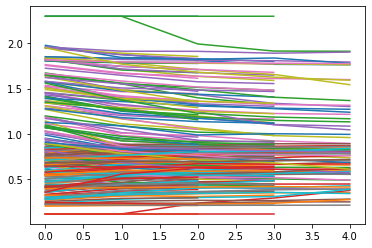

In [29]:
n_camadas_ocultas = [1,2,3]
n_units = [2,4,6]
activation = ['relu','tanh']
drop_out = [0.1, 0.2]
epochs = [3,4,5]

for camadas in n_camadas_ocultas:
    for unidades in n_units:
        for ativacao in activation:
            for drop in drop_out:
                for epocas in epochs:
                    treina_dl(camadas,unidades,ativacao, drop, epocas)

In [ ]:
!pip install pyngrok

In [ ]:
!pip install mlflow ui

In [13]:
# run tracking UI in the background
get_ipython().system_raw("mlflow ui --port 5000 &") # run tracking UI in the background


In [16]:
from pyngrok import ngrok

# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = "28i8vWtRiy1Nam7ggzSsFAn695r_7jFJ5c9oUYFaUMpN4wATf"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

MLflow Tracking UI: https://096a-35-230-113-132.ngrok.io


In [ ]:
from shutil import make_archive
make_archive(
  'mlruns', 
  'zip',           # the archive format - or tar, bztar, gztar 
  root_dir=None,   # root for archive - current working dir if None
  base_dir=None)   # start archiving from here - cwd if None too

'mlruns.zip'

In [ ]:
from google.colab import files 
files.download('mlruns.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Et deposer ce repertoire dans un repertoir a partir duquel tu executes le anaconda prompt, tu fais:
mlflow ui 
#il s execute par defaut sur le port 5000, tu accesses d abord le lien:
localhost:5000